# Week 1 - Homework

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_jan = pd.read_parquet("data/fhv_tripdata_2021-01.parquet")
df_feb = pd.read_parquet("data/fhv_tripdata_2021-02.parquet")

In [3]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [4]:
with pd.option_context("display.max_columns", None):
    display(df_jan.head())

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


## Q1

In [5]:
df_jan.shape[0]

1154112

## Q2

In [6]:
df_jan["duration"] = (df_jan.dropOff_datetime - df_jan.pickup_datetime).dt.total_seconds() / 60
df_jan.duration.mean()

19.167224093791006

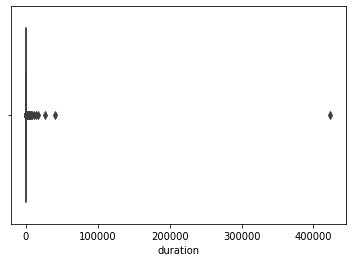

In [7]:
sns.boxplot(x="duration", data=df_jan)
plt.grid(False)
plt.show()

In [8]:
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]
df_jan.shape

(1109826, 8)

## Q3

In [9]:
df_jan.fillna(
    {
        "PUlocationID": -1,
        "DOlocationID": -1,
    },
    inplace=True
)

In [10]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            1109826 non-null  float64       
 4   DOlocationID            1109826 non-null  float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


In [11]:
100 * df_jan[df_jan.PUlocationID == -1].shape[0] / df_jan.shape[0]

83.52732770722618

## Q4

In [12]:
categorical = ["PUlocationID", "DOlocationID"]
dict_features = df_jan[categorical].astype(str).to_dict(orient="records")

vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(dict_features)

In [13]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

## Q5

In [14]:
target = "duration"
y_train = df_jan[target]

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
preds_train = lr.predict(X_train)
mean_squared_error(y_train, preds_train, squared=False)

10.528519414499133

## Q6

In [17]:
df_feb["duration"] = (df_feb["dropOff_datetime"] - df_feb["pickup_datetime"]).dt.total_seconds() / 60
df_feb.fillna(
    {
        "PUlocationID": -1,
        "DOlocationID": -1,
    },
    inplace=True
)
X_dev = vectorizer.transform(df_feb[categorical].astype("str").to_dict(orient="records"))
y_dev = df_feb["duration"]

preds_dev = lr.predict(X_dev)
mean_squared_error(y_dev, preds_dev, squared=False)

160.98557658849984